In [23]:
from vodscillator import *
import matplotlib.pyplot as plt
import numpy as np
import pickle
from plots import *
import scipy.io

In [24]:
if 1 == 0:
    filename = "V&D fig 3A, loc=0.1, glob=0, sr=128.pkl"
    # filepath = "/home/deniz/Dropbox/vodscillators/deniz pickle jar/"
    filepath = r"C:/Users/Owner/OneDrive/Documents/GitHub/vodscillators/Pickle Jar/"
    with open(filepath + filename, 'rb') as picklefile:
        vod = pickle.load(picklefile)
        wf = vod.SOO_sol[vod.n_transient:]
    #wf = np.pad(wf, 20) #padding might help???
    sr = 128
    xmax=6
    title = "V&D Model Simulated Waveform"
    t_win = 20
    khz=False
    legend_loc = "lower right"
    legend_fs = "12"
else:
    #filename = 'AC6rearSOAEwfB1.mat'
    filename = 'TH14RearwaveformSOAE.mat'
    mat = scipy.io.loadmat('SOAE Data/' + filename)
    wf = np.squeeze(mat['wf'])
    wf_title = filename
    sr = 44100
    xmax = 5
    title = "Human SOAE Waveform"
    t_win = 0.1
    khz=True
    legend_loc = "upper right"
    legend_fs = "15"



In [25]:
xmin=0
ymin=None
ymax=None
db=True
t_shift = t_win 
fs="18"

In [26]:
def temp_plot(wf, ax, hann):
    # get wfft so we don't have to do it twice below
    d = get_wfft(wf=wf, sr=sr, t_win=t_win, t_shift=t_shift, hann=hann)
    wfft = d["wfft"]
    # we'll want to pass this through the subsequent functions as well to maintain correspondence through all the shifts
    freq_ax = d["freq_ax"]
    

    # get (averaged over windows) PSD
    m = get_mags(wf=wf, sr=sr, t_win=t_win, wfft=wfft, freq_ax=freq_ax, return_all=True)
    mags = m["mags"]
    mags_freq_ax = m["freq_ax"]
    # get coherence
    c = get_coherence(wf=wf, sr=sr, t_win=t_win, wfft=wfft, ref_type=ref_type, freq_ax=freq_ax, bin_shift=1, return_all=True)
    coherence = c["coherence"]
    coherence_freq_ax = c["freq_ax"]

    
    if khz:
        mags_freq_ax = mags_freq_ax / 1000
        coherence_freq_ax = coherence_freq_ax / 1000
        xlabel = "Frequency [kHz]"
    else:
        xlabel = "Frequency [Hz]"

    if db:
        mags = 20*np.log10(mags)

    p1 = ax.plot(coherence_freq_ax, coherence, color='purple', label="Phase Coherence")
    ax.set_ylabel("Vector Strength", fontsize=fs)
    ax.set_xlabel(xlabel, fontsize=fs)
    ax.set_xlim(xmin, xmax)
    
    ax2 = ax.twinx()
    p2 = ax2.plot(mags_freq_ax, mags, color="red", label="Magnitude")
    ax2.set_ylabel("Magnitude [dB]", fontsize=fs)
    ax2.set_xlabel(xlabel, fontsize=fs)
    ax2.set_xlim(xmin, xmax)
    
    p = p1 + p2
    labs = [l.get_label() for l in p]
    ax.legend(p, labs, loc=legend_loc, fontsize=legend_fs)



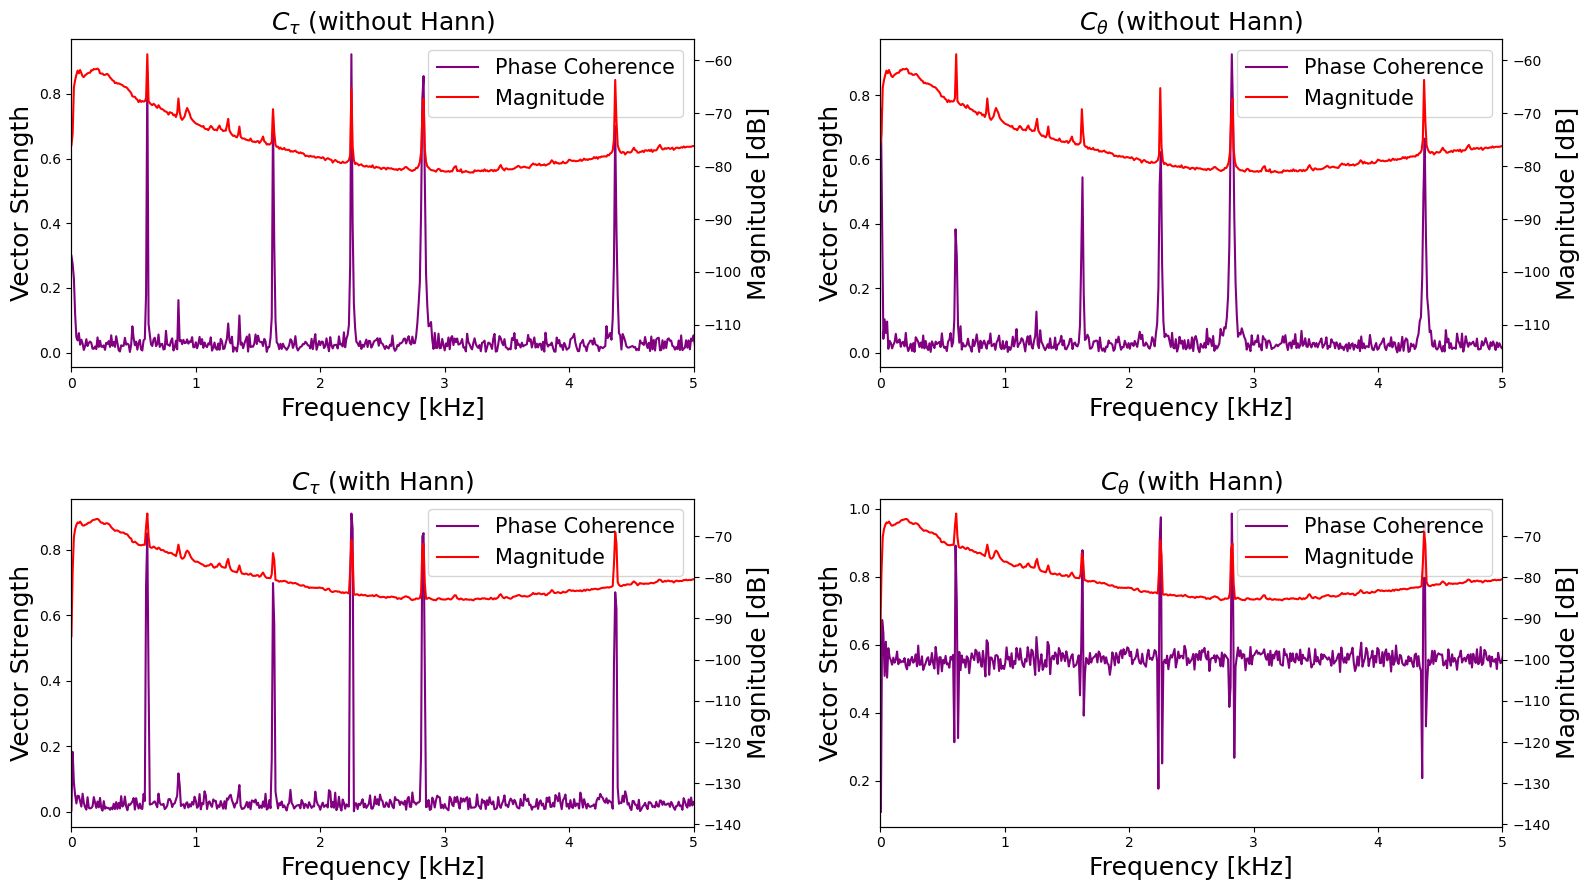

In [27]:
fig, _ = plt.subplots(2, 2)
axes = fig.axes

# fig.suptitle(title)


ref_type = "next_win"
temp_plot(wf, axes[0], hann=False)
axes[0].set_title(r"$C_{\tau}$ (without Hann)", fontsize=fs)


ref_type="next_freq"
temp_plot(wf, axes[1], hann=False)
axes[1].set_title(r"$C_{\theta}$ (without Hann)", fontsize=fs)


ref_type = "next_win"
temp_plot(wf, axes[2], hann=True)
axes[2].set_title(r"$C_{\tau}$ (with Hann)", fontsize=fs)


ref_type="next_freq"
temp_plot(wf, axes[3], hann=True)
axes[3].set_title(r"$C_{\theta}$ (with Hann)", fontsize=fs)


dpi=500
reso=[16, 9]
bbox="tight"
plt.gcf().set_size_inches(reso) # set figure's size manually to your full screen (32x18)
plt.tight_layout()



save_name = str("Hann comparison " + str(filename) + ".jpg")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
plt.savefig(save_name, dpi=dpi, bbox_inches=bbox, format="jpeg")
plt.show()

